In [3]:
from cruw import CRUW

data_root='./raw'
dataset = CRUW(data_root=data_root, sensor_config_name='sensor_config_rod2021')
print(dataset)


ModuleNotFoundError: No module named 'cruw'

In [4]:
print(dataset.sensor_cfg.camera_cfg)


NameError: name 'dataset' is not defined

In [3]:
print(dataset.sensor_cfg.radar_cfg)


{'ramap_rsize': 128, 'ramap_asize': 128, 'frame_rate': 30, 'crop_num': 3, 'n_chirps': 255, 'chirp_ids': [0, 64, 128, 192], 'sample_freq': 4000000.0, 'sweep_slope': 21001700000000.0, 'data_type': 'ROD2021', 'chirp_folder': 'RADAR_RA_H', 'ext': 'npy', 'ramap_rsize_label': 122, 'ramap_asize_label': 121, 'ra_min_label': -60, 'ra_max_label': 60, 'rr_min': 1.0, 'rr_max': 25.0, 'ra_min': -90, 'ra_max': 90}


In [4]:
print('camera intrinsics:')
print(dataset.sensor_cfg.calib_cfg['cam_calib']['2019_04_09']['cam_0']['camera_matrix'])
print('camera to radar translation:')
print(dataset.sensor_cfg.calib_cfg['t_cl2rh'])


camera intrinsics:
[[849.177455   0.       712.166787]
 [  0.       854.207389 543.445028]
 [  0.         0.         1.      ]]
camera to radar translation:
[0.11, -0.05, 0.06]


In [5]:
print(dataset.object_cfg.classes)


['pedestrian', 'cyclist', 'car']


20 95
4.900261829550543 29.739869694145295


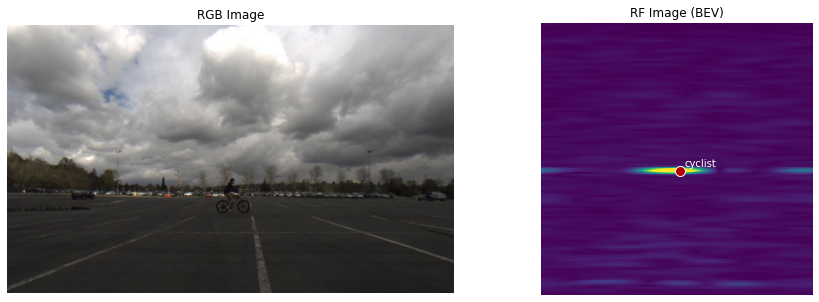

In [6]:
from cruw.mapping import ra2idx, idx2ra
import math
rng = 5.0
azm = math.radians(30)  # degree to radians
rid, aid = ra2idx(rng, azm, dataset.range_grid, dataset.angle_grid)
print(rid, aid)

rid = 20
aid = 95
rng, azm = idx2ra(rid, aid, dataset.range_grid, dataset.angle_grid)
print(rng, math.degrees(azm))

import os
import numpy as np
import matplotlib.pyplot as plt

from cruw.visualization.examples import show_dataset_rod2021

def get_paths(seq_name, frame_id):
    image_path = os.path.join(data_root, 'train', seq_name, 
                              dataset.sensor_cfg.camera_cfg['image_folder'], 
                              '%010d.jpg' % frame_id)
    chirp_path = os.path.join(data_root, 'train', seq_name, 
                              dataset.sensor_cfg.radar_cfg['chirp_folder'],
                              '%06d_0000.npy' % frame_id)
    anno_path = os.path.join(data_root, 'TRAIN_RAD_H_ANNO', 'train', seq_name + '.txt')
    return image_path, chirp_path, anno_path

seq_name = '2019_04_09_BMS1000'
frame_id = 400
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)


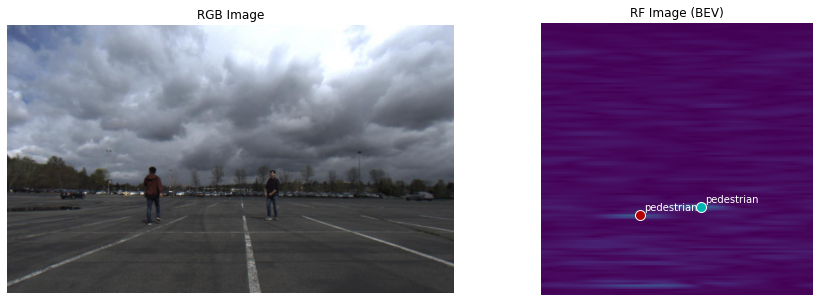

In [7]:
seq_name = '2019_04_09_PMS3000'
frame_id = 200
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)

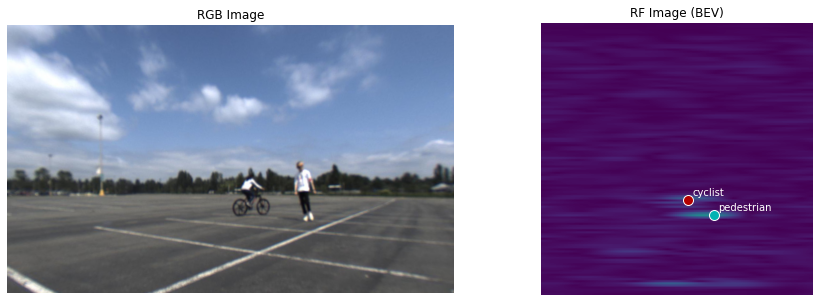

In [8]:
seq_name = '2019_05_29_PBMS007'
frame_id = 300
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)

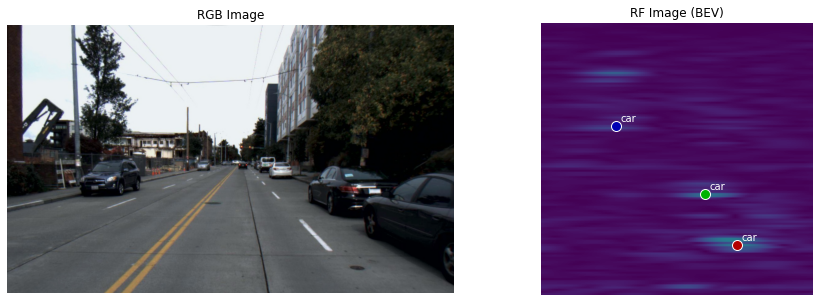

In [9]:
seq_name = '2019_09_29_ONRD001'
frame_id = 834
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)

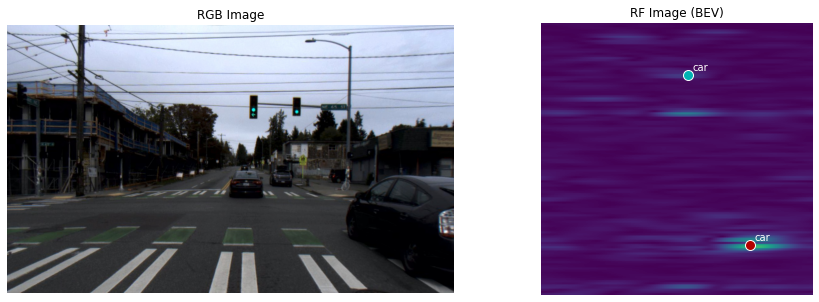

In [10]:
seq_name = '2019_09_29_ONRD002'
frame_id = 900
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)

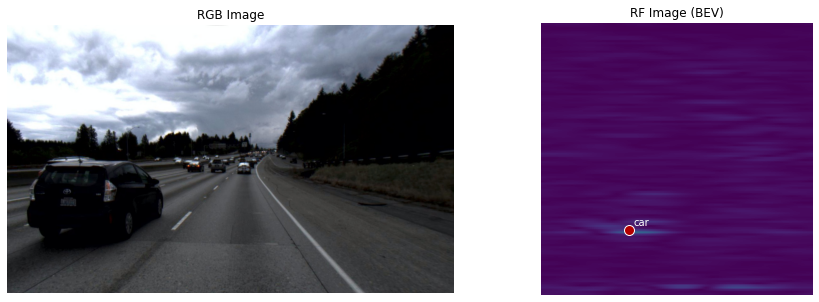

In [11]:
seq_name = '2019_09_29_ONRD011'
frame_id = 1000
image_path, chirp_path, anno_path = get_paths(seq_name, frame_id)
show_dataset_rod2021(image_path, chirp_path, anno_path, dataset)

In [12]:
from cruw.eval import evaluate_rod2021

submit_dir = '<SUBMISSION_DIR>'
truth_dir = '<ANNOTATION_DIR>'
evaluate_rod2021(submit_dir, truth_dir, dataset)

FileNotFoundError: [Errno 2] No such file or directory: '<SUBMISSION_DIR>'